In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
housing = pd.read_csv("housing.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


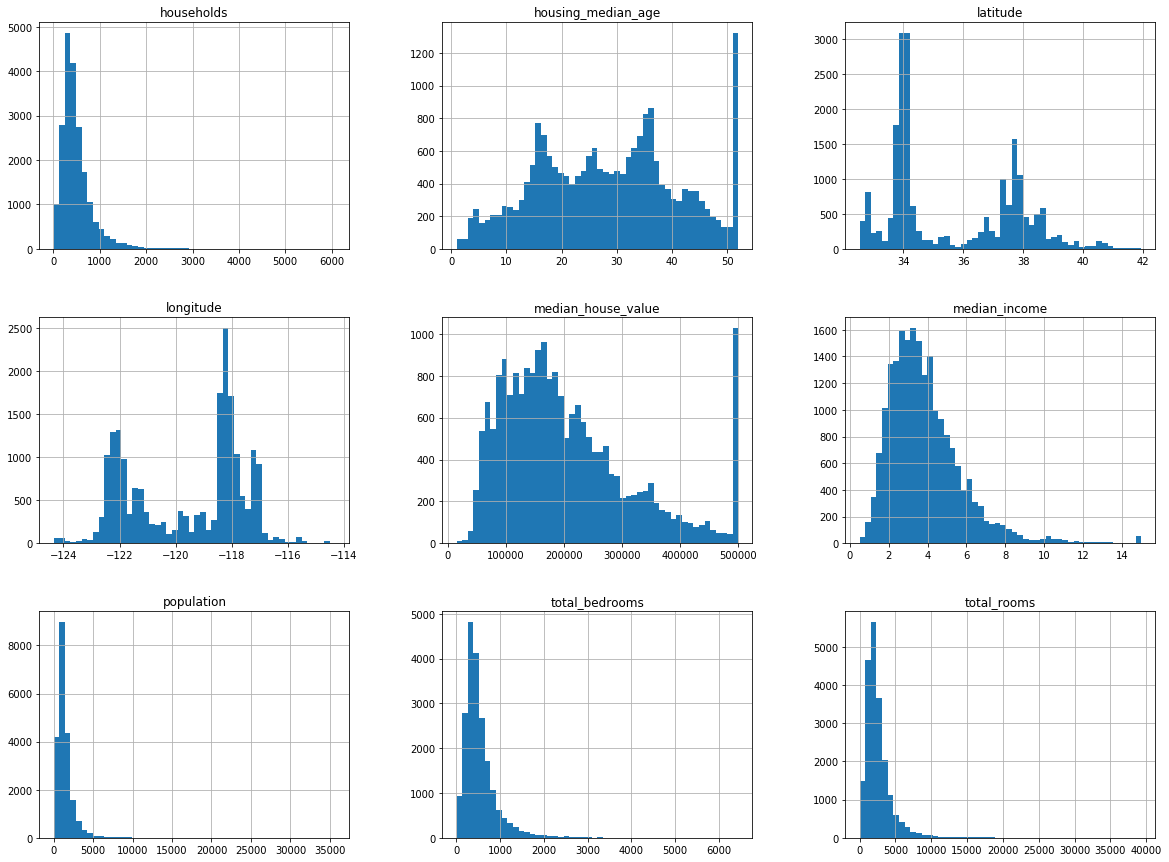

In [7]:
housing.hist(bins = 50, figsize = (20,15))
plt.show()

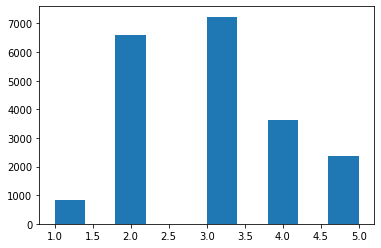

In [8]:
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5, 5.0, inplace = True)
plt.hist(housing["income_cat"])
plt.show()

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train = housing.loc[train_index]
    strat_test = housing.loc[test_index]

In [10]:
housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [11]:
for sets in (strat_train,strat_test):
    sets.drop("income_cat", axis = 1,inplace = True)

In [12]:
strat_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


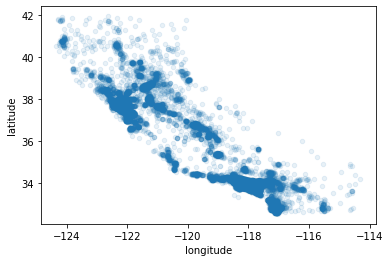

In [13]:
strat_train.plot(kind= "scatter" ,x = "longitude" , y = "latitude" , alpha = 0.1)

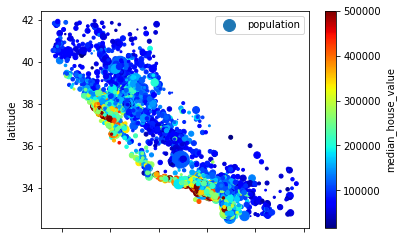

In [14]:
strat_train.plot(kind="scatter", x = "longitude", y="latitude",
               s = strat_test["population"]/100 , label = "population",
               c = "median_house_value" , cmap = plt.get_cmap("jet"),colorbar = True)
plt.legend()

In [15]:
corr_matrix = strat_train.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000267AC7E9E48>,
      dtype=object)

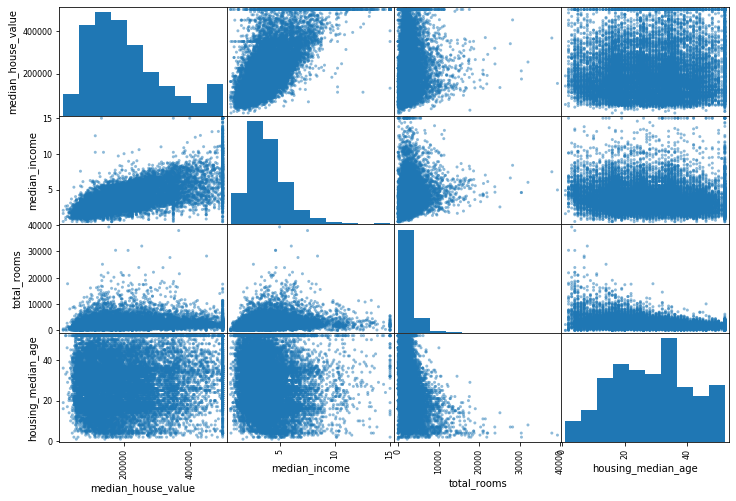

In [16]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income","total_rooms","housing_median_age"]
scatter_matrix(strat_train[attributes], figsize = (12,8))

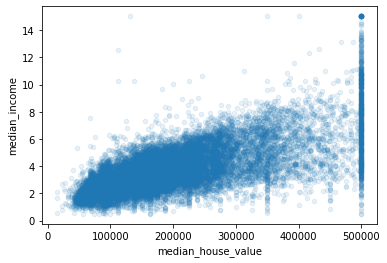

In [17]:
strat_train.plot(kind = "scatter", x = "median_house_value", y = "median_income" , alpha = 0.1)

In [18]:
housing = strat_train.copy()

In [19]:
housing["rooms_per_house"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_house"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_house"] = housing["population"]/housing["households"]

In [20]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value      1.000000
median_income           0.687160
rooms_per_house         0.146285
total_rooms             0.135097
housing_median_age      0.114110
households              0.064506
total_bedrooms          0.047689
population_per_house   -0.021985
population             -0.026920
longitude              -0.047432
latitude               -0.142724
bedrooms_per_house     -0.259984
Name: median_house_value, dtype: float64

In [21]:
housing = strat_train.drop("median_house_value",axis =1)
housing_label = strat_train["median_house_value"].copy()
housing_test = strat_test["median_house_value"].copy()

# Function Transformers
We can create our very own transformers to perform cleanup operations or combining specific attributes.
You can do so by creating a functions 

In [22]:
from sklearn.preprocessing import FunctionTransformer
#column index
room_ix , bedrooms_ix , population_ix , household_ix = 3,4,5,6
def add_extra_f(X,add_bedrooms_per_room = True):
    rooms_per_household = X[:,room_ix]/X[:,household_ix]
    population_per_household = X[:,population_ix]/X[:,household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_household = X[:,bedrooms_ix]/X[:,household_ix]
        return np.c_[X,rooms_per_household,population_per_household,
                    bedrooms_per_household]
    else:
        return np.c_[X,rooms_per_household,population_per_household]
attr_addr = FunctionTransformer(add_extra_f, validate = False,
                               kw_args ={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_addr.fit_transform(housing.values)

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [28]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_hot.toarray()

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Instead of using toarary() and converting a sparse matrix into an array we can also use LabelBinarizer instead of OneHotEncoder. This will return value directly into an array.

# Feature Scaling
**Two types of feature scaling**
- 1 min-max scaling (Normalization)
Here the values are subtracted by min value and divided by difference was max and min. Values then range between **0 and 1**

- 2 Standardization
Subtracts mean value (standardized values have a zero mean) and divides the value by the variance hence resulting distribution has unit variance. **This does not bound to a psecific range like min-max algorith which is a problem to a few algotrithms like NN who expect value between 0 and 1.
Standardization is however much less affected by outliers**


## Transformation Pipeline
As there are a lot of transformations we can perform them althogether by creating a pipeline.
The pipelne method needs to end with a transform method for  eg in the eg below instead of fit() or transform() or transform_fit() we use StandardScalar() which is a transform method.

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
housing_num = housing.drop("ocean_proximity",axis = 1)
num_pipeline = Pipeline([
    ('imputer', Imputer(strategy = "median")),
    ('attr_addr', FunctionTransformer(add_extra_f , validate = False)),
    ("std_scalar", StandardScaler())    
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [30]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    

In [31]:
from sklearn.preprocessing import LabelBinarizer
num = list(housing_num)
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
    ("Selector",DataFrameSelector(num)),
    ('imputer', Imputer(strategy = "median")),
    ('attr_addr', FunctionTransformer(add_extra_f , validate = False)),
    ("std_scalar", StandardScaler())    
])

cat_pipeline = Pipeline([
('selector', DataFrameSelector(cat_attribs)),
('one_hot_encoder', OneHotEncoder(sparse=False)),
])



C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [32]:
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list = [
    ("Numerical", num_pipeline),
    ("Categories", cat_pipeline)
])

In [33]:
housing_final = full_pipeline.fit_transform(housing)

In [34]:
housing_final.shape

(16512, 16)

In [35]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_final,housing_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
some_data = housing.iloc[:5]
some_labels = housing_label.iloc[:5]
prepared_Data = full_pipeline.transform(some_data)
print(lin_reg.predict(prepared_Data))
print(list(some_labels))

[211881.21811279 321219.24211009 210877.63065011  62198.25451316
 194847.8414579 ]
[286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [37]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_final)
lin_mse = mean_squared_error(housing_label, housing_predictions)
lin_mse = np.sqrt(lin_mse)
print(lin_mse)

68911.49637588045


In [38]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_final,housing_label)
housing_pred = tree_reg.predict(housing_final)
tree_rmse = np.sqrt(mean_squared_error(housing_label, housing_pred))
print(tree_rmse)

0.0


In [39]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_final,housing_label,
                        scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Score:", scores)
    print("Mean:", scores.mean())
    print("deviation:", scores.std())
display_scores(tree_rmse_scores)

Score: [69672.20764465 69500.10099223 71610.47174735 72293.22272278
 69476.98029881 74035.91489464 74181.62956004 70025.34514713
 76556.68328969 68765.33785301]
Mean: 71611.78941503339
deviation: 2465.654041920588


In [40]:
lin_scores = cross_val_score(lin_reg, housing_final, housing_label,
                            scoring = "neg_mean_squared_error",cv = 10 )
lin_rmse = np.sqrt(-lin_scores)
display_scores(lin_rmse)

Score: [67474.11780426 67233.22466524 69301.86479972 74716.01783105
 68426.80214612 71609.98356263 65200.14338307 68687.78826919
 72262.43484426 68111.81213342]
Mean: 69302.41894389637
deviation: 2653.460699447042


In [41]:
from sklearn.ensemble import RandomForestRegressor
rr = RandomForestRegressor()
rr_scores = cross_val_score(rr, housing_final , housing_label,
                           scoring = "neg_mean_squared_error", cv = 10)
rr_rmse = np.sqrt(-rr_scores)
display_scores(rr_rmse)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

Score: [52101.95289212 50233.92020475 53238.84657806 55806.21502666
 51881.82662125 56258.51373324 52043.32283702 49580.09570194
 54798.41663663 53027.50298618]
Mean: 52897.06132178601
deviation: 2097.5669634257265


In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {"n_estimators": [3,10,30], "max_features":[2,4,6,8]},
    {"bootstrap":[False], "n_estimators": [3,10] , "max_features": [2,3,4]}
]
forest_Reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_Reg, param_grid, cv = 5,
                          scoring = "neg_mean_squared_error")
grid_search.fit(housing_final,housing_label)
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [43]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [44]:
cvres = grid_search.cv_results_
for mean_scores,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_scores), params)

64413.90483690194 {'max_features': 2, 'n_estimators': 3}
55193.88367732388 {'max_features': 2, 'n_estimators': 10}
53061.029437999896 {'max_features': 2, 'n_estimators': 30}
61528.51517600777 {'max_features': 4, 'n_estimators': 3}
53134.47837625765 {'max_features': 4, 'n_estimators': 10}
50615.72409847911 {'max_features': 4, 'n_estimators': 30}
59201.719025474544 {'max_features': 6, 'n_estimators': 3}
51998.92818316317 {'max_features': 6, 'n_estimators': 10}
49942.35605747515 {'max_features': 6, 'n_estimators': 30}
58243.672559454186 {'max_features': 8, 'n_estimators': 3}
51875.05786866958 {'max_features': 8, 'n_estimators': 10}
50037.92857164175 {'max_features': 8, 'n_estimators': 30}
63061.37510982295 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54642.32012630975 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60520.68326734042 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52444.96628950552 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }
grid2_search = RandomizedSearchCV(forest_Reg,param_distribs,n_iter=10, cv = 5,
                          scoring = "neg_mean_squared_error")
grid2_search.fit(housing_final,housing_label)
grid2_search.best_params_

{'max_features': 7, 'n_estimators': 179}

In [46]:
cvres = grid2_search.cv_results_
for mean_scores,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_scores), params)

49374.66582825252 {'max_features': 4, 'n_estimators': 156}
51439.80224932055 {'max_features': 3, 'n_estimators': 31}
48939.201879731976 {'max_features': 7, 'n_estimators': 179}
49657.18314110821 {'max_features': 6, 'n_estimators': 30}
49017.67180945846 {'max_features': 7, 'n_estimators': 96}
52148.562377926006 {'max_features': 5, 'n_estimators': 11}
50450.77641125306 {'max_features': 6, 'n_estimators': 19}
50630.36862877743 {'max_features': 3, 'n_estimators': 48}
55234.12490747198 {'max_features': 1, 'n_estimators': 78}
48952.16521148801 {'max_features': 7, 'n_estimators': 131}


In [47]:
feature_importance = grid_search.best_estimator_.feature_importances_
extra_attribs = ["room_per_hous","pop_per_house","bedrooms_per_house"]
attr = num + extra_attribs 
sorted(zip(feature_importance,attr),reverse = True)

[(0.37055621783136605, 'median_income'),
 (0.10705700723125719, 'pop_per_house'),
 (0.07793207369060515, 'longitude'),
 (0.07727032956447503, 'room_per_hous'),
 (0.07379126361196389, 'latitude'),
 (0.040969164923257556, 'housing_median_age'),
 (0.024776913785000958, 'bedrooms_per_house'),
 (0.018443239224104045, 'total_rooms'),
 (0.018045699326993615, 'population'),
 (0.01730868940161701, 'total_bedrooms'),
 (0.016445537696988487, 'households')]

In [48]:
final_model = grid_search.best_estimator_

X_test = strat_test.drop("median_house_value", axis=1)
y_test = strat_test["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [50]:
print(final_rmse)

47657.0869180344
